In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

input_file = "python_rejection_curve.csv"

df = pd.read_csv(input_file, header=0)
df_uncalibrated = df.copy()
df_uncalibrated = df_uncalibrated[['true.label', 'uncalibrated']]
df_calibrated = df.copy()
df_calibrated = df_calibrated[['true.label', 'calibrated']]


The confidence for a binary classifier is the distance of the predicted probability from 0.5. We compute that as the maximum of p and 1 - p

In [10]:
score = np.copy(df_uncalibrated['uncalibrated'])
df_uncalibrated['confidence'] = np.maximum(score, 1.0 - score)
score = np.copy(df_calibrated['calibrated'])
df_calibrated['confidence'] = np.maximum(score, 1.0 - score)
df_calibrated

,true.label,calibrated,confidence
0,1,0.19966,0.80034
1,0,0.13566,0.86434
2,0,0.16406,0.83594
3,0,0.22737,0.77263
4,0,0.45259,0.54741
5,0,0.11312,0.88688
6,0,0.16370,0.83630
7,1,0.15121,0.84879
8,0,0.11770,0.88230
9,1,0.13685,0.86315


Now we sort by decreasing order of confidence. This is the order in which rejection decisions would be made if we started with the threshold tau at 1 and decreased it to 0. 

In [11]:
df_uncalibrated = df_uncalibrated.sort_values("confidence", ascending = False)
df_calibrated = df_calibrated.sort_values("confidence", ascending = False)
df_calibrated

,true.label,calibrated,confidence
4786,0,0.11139,0.88861
1767,0,0.11139,0.88861
4734,0,0.11150,0.88850
3225,0,0.11151,0.88849
1637,0,0.11159,0.88841
3762,0,0.11164,0.88836
3816,0,0.11167,0.88833
3182,0,0.11177,0.88823
2384,0,0.11179,0.88821
2010,0,0.11180,0.88820


If the probabilities are well-calibrated, then the optimal decision-making threshold is 0.5. So we use round() to predict the labels and then use 1 - |true.label - predicted.label| to determine whether the prediction is correct

In [12]:
df_uncalibrated['predicted.label'] = df_uncalibrated['uncalibrated'].round()
df_uncalibrated['correct.prediction'] = 1 - abs(df_uncalibrated['true.label'] - df_uncalibrated['predicted.label'])
df_calibrated['predicted.label'] = df_calibrated['calibrated'].round()
df_calibrated['correct.prediction'] = 1 - abs(df_calibrated['true.label'] - df_calibrated['predicted.label'])
df_calibrated

,true.label,calibrated,confidence,predicted.label,correct.prediction
4786,0,0.11139,0.88861,0.0,1.0
1767,0,0.11139,0.88861,0.0,1.0
4734,0,0.11150,0.88850,0.0,1.0
3225,0,0.11151,0.88849,0.0,1.0
1637,0,0.11159,0.88841,0.0,1.0
3762,0,0.11164,0.88836,0.0,1.0
3816,0,0.11167,0.88833,0.0,1.0
3182,0,0.11177,0.88823,0.0,1.0
2384,0,0.11179,0.88821,0.0,1.0
2010,0,0.11180,0.88820,0.0,1.0


Compute the precision at each possible threshold value. "count" is the number of examples not rejected and cs is the number correctly classified, so their ratio gives the precision (the fraction correctly classified)

In [13]:
n_rows = df_uncalibrated.shape[0]
count = np.arange(1, n_rows + 1, 1.0)
cs = np.array(df_uncalibrated['correct.prediction'].cumsum())
uncalibrated_precision = np.divide(cs, count)
cs = np.array(df_calibrated['correct.prediction'].cumsum())
calibrated_precision = np.divide(cs, count)
calibrated_precision

array([1.        , 1.        , 1.        , ..., 0.8047696 , 0.80460699,
       0.80444444])

This is the fraction rejected. It starts at 1.0 for a threshold tau of 1.0 and decreases to 0 as tau decreases to 0. 

In [14]:
rejected = 1.0 - np.arange(0, 1, 1.0/n_rows)
rejected

array([1.00000000e+00, 9.99797980e-01, 9.99595960e-01, ...,
       6.06060606e-04, 4.04040404e-04, 2.02020202e-04])

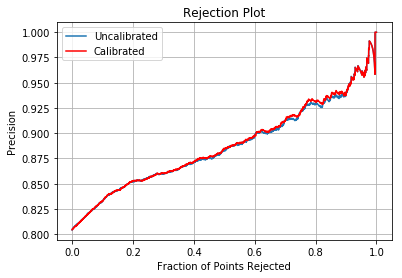

In [15]:
fig, ax = plt.subplots()
ax.plot(rejected, uncalibrated_precision, label = "Uncalibrated")
ax.plot(rejected, calibrated_precision, color = "red", label = "Calibrated")

ax.set(xlabel='Fraction of Points Rejected', ylabel='Precision',
       title='Rejection Plot')
ax.grid()
ax.legend(loc='upper left')

plt.show()